[View in Colaboratory](https://colab.research.google.com/github/versae/word_vectors_dh2018/blob/master/dh2018_workshop_wordvectors.ipynb)

# DH 2018 Workshop on Word Vectors

## **Welcome to Machine Reading!**

This is a hands-on workshop focusing on a various word vectorization methods and applications for DH.
The workshop will be split into 4 sections with 10 minute breaks in-between. The sections get incrementally more advanced, building on concepts and methods from the previous sections.

To follow along, you can run the script portions piecemeal, in order, as we progress through the workshop material.



## 1. Understanding Word Vectors with Visualization (50 mins)

This unit will give a brief introduction of word vectors and word embeddings. Concepts needed to
understand the internal mechanics of how they work will also be explained, with the help of plots and
visualizations that are commonly used when working with them.


● 0:00 - 0:20 From word counts to ML-derived Word Vectors (SVD, PMI, etc.)

● 0:20 - 0:35 Clustering, Vector Math, Vector Space Theory (Euclidean Distance, etc.)

● 0:35 - 0:50 [Activity 1] Visualizations (Clustering, PCA, t-SNE) [We provide vectors] - What are the limitations of these word vectors?

0. What are the different usage cases between count-based vectors and word2vec? (size of corpus)
1. What are limitations?
2. Why do we use Word2Vec instead?

## 2. Word Vectors via Word2Vec (50 mins)

This unit will focus on Word2Vec as an example of neural net-based approaches of vector encodings,
starting with a conceptual overview of the algorithm itself and end with an activity to train participants’ own
vectors.


● 0:00 - 0:15 Conceptual explanation of Word2Vec

● 0:15 - 0:30 Word2Vec Visualization and Vectorial Features and Math

● 0:30 - 0:50 [Activity 2] Word2Vec Construction [using Gensim] and Visualization (from part
1) [We provide corpus]


## 3. Pre-trained Models and Extended Vector Algorithms (50 mins)

This unit will explore the various flavors of word embeddings specifically tailored to sentences, word
meaning, paragraph, or entire documents. We will give an overview of pre-trained embeddings including
where they can be found and how to use them.

● 0:00 - 0:20 Pre-trained word embeddings (where to find them, which are good, configurations,
trained corpus, etc., e.g. https://github.com/facebookresearch/fastText)

● 0:20 - 0:35 Overview of other 2Vecs & other vector engineering: Paragraph2Vec, Sense2Vec,
Doc2Vec, etc.

● 0:35 - 0:50 [Activity 3] Choose, download, and use a pre-trained model

## 4. Role of Bias in Word Embeddings (50 mins)

In this unit, we will explore an application and caveat of using word embeddings -- cultural bias.
Presenting methods and results from recent articles, we will show how word embeddings can carry
historical bias of the corpora trained on and lead an activity that shows these human-biases on vectors
and how they can be mitigated.

● 0:00 - 0:10 Algorithmic bias vs human bias
(https://www.theguardian.com/books/2018/feb/19/women-better-represented-in-victorian-novels-t
han-modern-finds-study)

● 0:10 - 0:40 [Activity 4] Identifying bias in corpora (occupations, gender, ...) [GloVe]

● 0:40 - 0:50 Towards unbiased embeddings; Examine “debiased” embeddings

● 0:50 - 0:60 Conclusion remarks and debate


# 0. Setting Up 

Before we get started, let's go ahead and set up our notebook.

We will start by importing a few python libraries that we will throughout the workshop.


**What are these libraries?**


1.   NumPy: This is package for scientific computing in python. For us, NumPy is useful for vector operations. 
2.   NLTK: Easy to use python package for text processing (lemmatization, tokenization, POS-tagging, etc.)
3.   Plotly: Plotting package for visualization
4.   SciKitLearn: Easy to use python package for machine learning algorithms and preprocessing tools



In [11]:
!pip install numpy nltk scikit-learn matplotlib gensim

We will be working with a few sample texts using NLTK's corpus package.

In [3]:
!python -m nltk.downloader all

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /content/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /content/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /content/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /content

[nltk_data]    | Downloading package kimmo to /content/nltk_data...
[nltk_data]    |   Unzipping corpora/kimmo.zip.
[nltk_data]    | Downloading package knbc to /content/nltk_data...
[nltk_data]    | Downloading package lin_thesaurus to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/lin_thesaurus.zip.
[nltk_data]    | Downloading package mac_morpho to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/mac_morpho.zip.
[nltk_data]    | Downloading package machado to /content/nltk_data...
[nltk_data]    | Downloading package masc_tagged to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping models/moses_sample.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /co

[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/state_union.zip.
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/stopwords.zip.
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/subjectivity.zip.
[nltk_data]    | Downloading package swadesh to /content/nltk_data...
[nltk_data]    |   Unzipping corpora/swadesh.zip.
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/switchboard.zip.
[nltk_data]    | Downloading package timit to /content/nltk_data...
[nltk_data]    |   Unzipping corpora/timit.zip.
[nltk_data]    | Downloading package toolbox to /content/nltk_data...
[nltk_data]    |   Unzipping corpora/toolbox.zip.
[nltk_data]    | Downloading package treebank to /

[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping models/word2vec_sample.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/mte_teip5.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     /content/nltk_data...
[nltk_data]    |   Unzipping corpora/nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     /content/nltk_data...
[nltk_data

In [0]:
import numpy as np
import nltk
# import plotly.plotly as py
import sklearn 
import matplotlib.pyplot as plt
import gensim



---



# 1. Understanding Word Vectors with Visualization



## What is a word vector?

At the basic level, a word vector or emvedding is a **numerical representation** of a **word within a corpus**. Word vectors are tied to a corpus and might not make sense outside of it. Arguably, it the corpus is big enough, the word vectors should generalize well to othert similar corpus.

## What is a vector?

A vector is just a list of numbers of any nature.

Here is a list of 5 real numbers (represnted as floating point numbers). This vector has 5 dimensions or features, which is basically the length of the vector.

In [5]:
vector_of_floats = np.random.randn(5)
vector_of_floats

array([ 1.01232723, -0.21067592, -0.33684698,  0.18599853, -0.43689129])

Here is a list of 20 integers between 0 and 3 (exclusive; not including 3). Later we will go into more vector math but you can see that a vector is a multi-dimensional numerical representation.


---



In [6]:
vector_of_ints = np.random.randint(0,3,size=(20))
vector_of_ints

array([2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2])

Word vectors can be largely classified into **sparse** and **dense** vectors.

A **sparse** vector is just a vector with lots of 0's. When the vector represents countings of a word that co-occurs with other words, these vectors tend to be **sparse** since only a few word will co-ocur in practice.

Let's import `scikit-learn`'s `CountVectorizer()`



In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
documents = [
    "This is a piece of text. This is also some random text. Also text.",
]


Here, we have written up a temporary new regex for the purposes of the workshop. You can see that when we enter that parameter, we can count 'a' as a vocab term. 

As such you can modify the regex to fix you needs.

Let's now transform this document so that each word is given a unique ID number and a corresponding frequency number.

In [0]:
example_vectorizer = CountVectorizer()

In [10]:
counts = example_vectorizer.transform(documents)
print(counts)
print("   ^  ^         ^\n   |  |         |\n  doc word_id count")

NotFittedError: ignored

Now, let's iterate through all the vocab that appears in our original document and print all the counts that we generated above.

In [1]:
doc = 0  # first document
for word, word_id in example_vectorizer.vocabulary_.items():
    print(word, ":", counts[doc, word_id])

NameError: ignored

The document-term matrix looks like this.
Because we only have one document, we get one row (doc #0). Each element of the document represents vocabulary from above. The placement corresponding to the unique ID above, eg. 7th placement (8th, starting from 0) is 'text'.

In [196]:
counts = example_vectorizer.transform(documents)
counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

`CountVectorizer()` also has some options to disregard stopwords, count ngrams instead of words, cap the max number of words to count, normalize spelling, or count terms within a frequency range. It is worth exploring the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [229]:
mobydick_vectorizer = CountVectorizer(token_pattern=new_regex)
mobydick_vectorizer.fit([mobydick])
print("Vocabulary size:", len(mobydick_vectorizer.vocabulary_))
mobydick_vectorizer.vocabulary_

Vocabulary size: 17140


{'moby': 9592,
 'dick': 4225,
 'by': 2177,
 'herman': 7093,
 'melville': 9383,
 '1851': 82,
 'etymology': 5197,
 'supplied': 14639,
 'a': 189,
 'late': 8580,
 'consumptive': 3291,
 'usher': 16180,
 'to': 15275,
 'grammar': 6583,
 'school': 12914,
 'the': 15044,
 'pale': 10558,
 'threadbare': 15133,
 'in': 7631,
 'coat': 2879,
 'heart': 6991,
 'body': 1762,
 'and': 676,
 'brain': 1894,
 'i': 7440,
 'see': 13060,
 'him': 7144,
 'now': 10100,
 'he': 6958,
 'was': 16591,
 'ever': 5222,
 'dusting': 4722,
 'his': 7164,
 'old': 10268,
 'lexicons': 8736,
 'grammars': 6584,
 'with': 16913,
 'queer': 11842,
 'handkerchief': 6834,
 'mockingly': 9599,
 'embellished': 4915,
 'all': 551,
 'gay': 6329,
 'flags': 5798,
 'of': 10234,
 'known': 8465,
 'nations': 9907,
 'world': 16996,
 'loved': 8975,
 'dust': 4721,
 'it': 8168,
 'somehow': 13830,
 'mildly': 9483,
 'reminded': 12232,
 'mortality': 9701,
 'while': 16776,
 'you': 17113,
 'take': 14850,
 'hand': 6826,
 'others': 10386,
 'teach': 14936,
 'th

**Let's now play with three texts/documents in our corpus, taken from literature. ** 

We will use Moby Dick as our example corpus.

In [0]:
from nltk.corpus import gutenberg  # which should we use? gutenberg requires a about two more lines of code

NOTE: gutenberg raw vs words, sents

In [0]:

mobydick = gutenberg.raw('melville-moby_dick.txt')
emma = gutenberg.raw('austen-emma.txt')
parents = gutenberg.raw('edgeworth-parents.txt')





In [0]:
corpus = [mobydick, emma, parents]

In [240]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit([mobydick])
print("Vocabulary size:", len(count_vectorizer.vocabulary_))
count_vectorizer.vocabulary_

Vocabulary size: 17110


{'moby': 9572,
 'dick': 4213,
 'by': 2167,
 'herman': 7077,
 'melville': 9363,
 '1851': 81,
 'etymology': 5184,
 'supplied': 14615,
 'late': 8561,
 'consumptive': 3280,
 'usher': 16154,
 'to': 15250,
 'grammar': 6568,
 'school': 12890,
 'the': 15019,
 'pale': 10535,
 'threadbare': 15108,
 'in': 7614,
 'coat': 2868,
 'heart': 6975,
 'body': 1752,
 'and': 666,
 'brain': 1884,
 'see': 13036,
 'him': 7128,
 'now': 10079,
 'he': 6942,
 'was': 16563,
 'ever': 5209,
 'dusting': 4710,
 'his': 7148,
 'old': 10246,
 'lexicons': 8717,
 'grammars': 6569,
 'with': 16885,
 'queer': 11819,
 'handkerchief': 6818,
 'mockingly': 9579,
 'embellished': 4902,
 'all': 541,
 'gay': 6314,
 'flags': 5784,
 'of': 10212,
 'known': 8447,
 'nations': 9886,
 'world': 16968,
 'loved': 8956,
 'dust': 4709,
 'it': 8151,
 'somehow': 13806,
 'mildly': 9463,
 'reminded': 12209,
 'mortality': 9681,
 'while': 16748,
 'you': 17083,
 'take': 14825,
 'hand': 6810,
 'others': 10364,
 'teach': 14911,
 'them': 15024,
 'what': 16

Noticed something missing? Take a look at the parameter [`token_pattern` of `CountVectorizer()`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). The way a chunk of text is divided up in sentences and then in words is dependant upon our definitions of sentence and word boundaries. The process of splitting a text in words is usually known as **tokenization**. While the most simple *tokenizers* would split sentences on dots and words on spaces, these rules don't always take into account all cases (e.g, "Dr. Evil is not that bad." would be split in two sentences, "Dr" and "Evil is not that bad"). For this reason, more complex rules can be set using [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) and then passed in to `CountVectorizer()` via the `token_pattern` parameter.


In [0]:
new_regex = r"(?u)\b\w+\b"

NOTE no numbers regex

NOTE for tokenized corpora:  you need to pass in extra parameters to count vectorize


analyzer='word', tokenizer=lambda x: x

To get the ID of a given vocab term:

In [245]:
lit_vectorizer = CountVectorizer(token_pattern=new_regex)
lit_vectorizer.fit([mobydick])
print("Vocabulary size:", len(lit_vectorizer.vocabulary_))
lit_vectorizer.vocabulary_

Vocabulary size: 17140


{'moby': 9592,
 'dick': 4225,
 'by': 2177,
 'herman': 7093,
 'melville': 9383,
 '1851': 82,
 'etymology': 5197,
 'supplied': 14639,
 'a': 189,
 'late': 8580,
 'consumptive': 3291,
 'usher': 16180,
 'to': 15275,
 'grammar': 6583,
 'school': 12914,
 'the': 15044,
 'pale': 10558,
 'threadbare': 15133,
 'in': 7631,
 'coat': 2879,
 'heart': 6991,
 'body': 1762,
 'and': 676,
 'brain': 1894,
 'i': 7440,
 'see': 13060,
 'him': 7144,
 'now': 10100,
 'he': 6958,
 'was': 16591,
 'ever': 5222,
 'dusting': 4722,
 'his': 7164,
 'old': 10268,
 'lexicons': 8736,
 'grammars': 6584,
 'with': 16913,
 'queer': 11842,
 'handkerchief': 6834,
 'mockingly': 9599,
 'embellished': 4915,
 'all': 551,
 'gay': 6329,
 'flags': 5798,
 'of': 10234,
 'known': 8465,
 'nations': 9907,
 'world': 16996,
 'loved': 8975,
 'dust': 4721,
 'it': 8168,
 'somehow': 13830,
 'mildly': 9483,
 'reminded': 12232,
 'mortality': 9701,
 'while': 16776,
 'you': 17113,
 'take': 14850,
 'hand': 6826,
 'others': 10386,
 'teach': 14936,
 'th

In [0]:
X = lit_vectorizer.fit_transform(corpus)

This is what the doc-term matrix looks like for our three document corpus.

In [249]:
X.toarray()

array([[20,  2,  4, ...,  0,  2,  1],
       [ 2,  0,  2, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0]], dtype=int64)

NOTE: each row corresponds to each document; each column of words in our vocabulary

In [250]:
print("The ID of the word 'piece' is ", str(count_vectorizer.vocabulary_.get('piece')))

The ID of the word 'piece' is  13982


The dimensions of the matrix are given by the shape property.

In [26]:
X.toarray().shape

(3, 9255)

In [27]:
print("The doc-term matrix has {} documents and {} dimensions.".format(str(X.toarray().shape[0]), str(X.toarray().shape[1])))

The doc-term matrix has 3 documents and 9255 dimensions.


These dimensions each represent one unique vocabulary. They are...

In [28]:
lit_vectorizer.get_feature_names() 

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '17',
 '1729',
 '1772',
 '1778',
 '18',
 '1811',
 '1821',
 '1828',
 '1833',
 '1836',
 '1839',
 '1840',
 '1846',
 '1851',
 '19',
 '1st',
 '2',
 '20',
 '200th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '275th',
 '3',
 '31st',
 '3d',
 '4',
 '40',
 '440',
 '5',
 '500',
 '6',
 '7',
 '7000l',
 '8',
 '890',
 '9',
 '_____________',
 'a',
 'aaaaaaaaah',
 'aaaaaaaah',
 'aaaaaah',
 'aaaah',
 'aaaaugh',
 'aaagh',
 'aaah',
 'aaauggh',
 'aaaugh',
 'aaauugh',
 'aaggggh',
 'aagh',
 'aah',
 'aaugh',
 'aauuggghhh',
 'aauuugh',
 'aauuuuugh',
 'aauuuves',
 'abandon',
 'abashed',
 'abed',
 'abhor',
 'abhorred',
 'abhorrence',
 'abilities',
 'ability',
 'able',
 'ablest',
 'ablutions',
 'aboard',
 'abode',
 'abominable',
 'abominate',
 'abominated',
 'aboriginal',
 'abounded',
 'about',
 'above',
 'abreast',
 'abroad',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorbing',
 'abstruse'

Let's get vocab ID's for 'happy', 'sad', 'angry'

In [29]:
print(lit_vectorizer.vocabulary_.get('happy'))
print(lit_vectorizer.vocabulary_.get('sad'))
print(lit_vectorizer.vocabulary_.get('angry'))
print(lit_vectorizer.vocabulary_.get('biscuits'))

3775
6941
381
926


Word-word Matrix

In [0]:
WW = X.T * X

Talk about the matrix math; symmetric matrix

In [31]:
WW.toarray()

array([[5781,   80,   79, ...,   76,   76, 1748],
       [  80,    6,    4, ...,    1,    1,   23],
       [  79,    4,    3, ...,    1,    1,   23],
       ...,
       [  76,    1,    1, ...,    1,    1,   23],
       [  76,    1,    1, ...,    1,    1,   23],
       [1748,   23,   23, ...,   23,   23,  529]], dtype=int64)

In [32]:
WW.shape

(9255, 9255)

In [0]:
happy_vector = WW[3775,:]
sad_vector = WW[6941,:]
angry_vector = WW[381,:]
biscuit_vector = WW[926,:]

In [34]:
angry_vector.toarray()

array([[6, 3, 3, ..., 0, 0, 0]])

PPMI Matrix

**Dense Vectorization**

SVD

In [0]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=8)

In [0]:
dense = svd.fit_transform(WW) #n_samples, n_dims

In [37]:
dense.shape

(9255, 8)

In [0]:
happy_vector_dense = dense[3775,:]
sad_vector_dense = dense[6941,:]
angry_vector_dense = dense[381,:]
biscuit_vector_dense = dense[926,:]

In [39]:
happy_vector_dense

array([ 1.12780362e+05, -2.60076891e+04,  1.00390973e+03,  9.61227132e-11,
        4.32109741e-11, -2.22001874e-11, -3.24847193e-11,  1.68588359e-11])

**Vector** **Math**

There are several ways of working with vectors in data science. Since we are working with text data converted into numerial vectors, many of these methods can be applied for text analysis too. Some specific methods tend to perform better for text and these include cosine similarity (over euclidean distance) and k-means (over k-mode or others). 


Cosine Similarity

In [0]:
from sklearn.metrics.pairwise import cosine_similarity as cossim

In [0]:
happy_vector = happy_vector_dense.reshape(1,-1) #n_samples_X, n_features
sad_vector = sad_vector_dense.reshape(1,-1)
angry_vector = angry_vector_dense.reshape(1,-1)
biscuit_vector = biscuit_vector_dense.reshape(1,-1)

In [42]:
cossim(happy_vector, sad_vector)

array([[0.97380657]])

In [43]:
cossim(angry_vector, sad_vector)

array([[0.96991578]])

In [44]:
cossim(happy_vector, biscuit_vector)

array([[0.72203603]])

Clustering - k-means

Let's work with a small set of words



In [0]:
selection = ['happy','sad','angry','biscuit','bible']

In [0]:
#iterate through all of these words to make a matrix
select_matrix = []
for word in selection:
  word_id = lit_vectorizer.vocabulary_.get(word)
  select_matrix.append(dense[word_id,:])
select_matrix = np.array(select_matrix)


In [47]:
np.array(select_matrix).shape

(5, 8)

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=3)

In [50]:
select_matrix #n_samples, n_features

array([[ 1.12780362e+05, -2.60076891e+04,  1.00390973e+03,
         9.61227132e-11,  4.32109741e-11, -2.22001874e-11,
        -3.24847193e-11,  1.68588359e-11],
       [ 5.05942321e+03, -7.18176788e+02,  1.15221520e+03,
         4.81231681e-12, -5.96668932e-12, -6.92453851e-13,
        -4.90333163e-13,  1.85825288e-12],
       [ 1.10727608e+04, -2.62425515e+03, -7.62540072e+01,
        -2.72779265e-13,  4.38668539e-12,  1.76985884e-14,
        -7.24474466e-12,  1.72825195e-12],
       [ 1.51587694e+04,  3.35126996e+03, -3.26235252e+02,
        -1.63251722e-11, -9.04034934e-12, -4.78502708e-12,
         1.63380098e-12, -7.70333095e-12],
       [ 1.51587694e+04,  3.35126996e+03, -3.26235252e+02,
        -1.63251722e-11, -9.04034934e-12, -4.78502708e-12,
         1.63380098e-12, -7.70333095e-12]])

In [51]:
predictions = kmeans.fit_predict(select_matrix)
predictions

array([0, 2, 2, 1, 1], dtype=int32)

**Visualizations**

t-sne

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2) #n-components = reduced dimensions

In [0]:
embed = tsne.fit_transform(select_matrix)

Text(0.5,1,'tsne visual of 5 word embeddings')

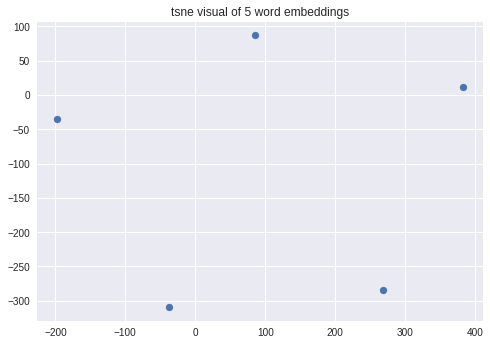

In [54]:
random_x, random_y = zip(*embed)
plt.scatter(random_x,random_y)
plt.title("tsne visual of 5 word embeddings")


Clustering

In [0]:
first_cluster = np.array(embed[np.where(predictions == 0)])
second_cluster = np.array(embed[np.where(predictions == 1)])
third_cluster = np.array(embed[np.where(predictions == 2)])

In [56]:
first_cluster

array([[84.86749, 86.61573]], dtype=float32)

In [57]:
second_cluster

array([[ 382.83484  ,   11.6426935],
       [ -36.936703 , -309.31418  ]], dtype=float32)

Text(0.5,1,'k-means clustering of tsne example')

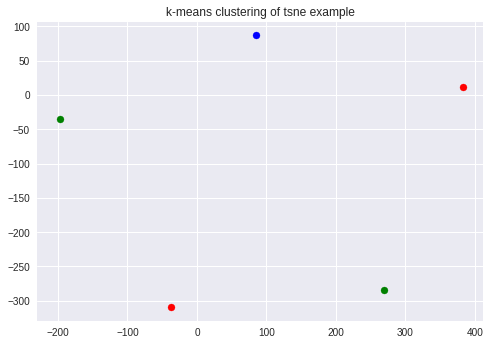

In [58]:
plt.scatter(first_cluster[:,0],first_cluster[:,1], color="blue") #first cluster
plt.scatter(second_cluster[:,0],second_cluster[:,1], color="red") #second cluster
plt.scatter(third_cluster[:,0],third_cluster[:,1], color="green") #second cluster
plt.title("k-means clustering of tsne example")

Now, let's do this with the entire set.

In [0]:
kmeans = KMeans(n_clusters=15)
predictions = kmeans.fit_predict(dense)
tsne = TSNE(n_components=2)

In [60]:
embed = tsne.fit_transform(dense)
random_x, random_y = zip(*embed)
plt.scatter(random_x,random_y)
plt.title("tsne visual of 5 word embeddings")

KeyboardInterrupt: ignored

In [0]:
first_cluster = np.array(embed[np.where(predictions == 0)])
second_cluster = np.array(embed[np.where(predictions == 1)])
third_cluster = np.array(embed[np.where(predictions == 2)])

In [0]:
plt.scatter(first_cluster[:,0],first_cluster[:,1], color="blue") #first cluster
plt.scatter(second_cluster[:,0],second_cluster[:,1], color="red") #second cluster
plt.scatter(third_cluster[:,0],third_cluster[:,1], color="green") #second cluster
plt.title("k-means clustering of tsne example")

# 2. Word Vectors via Word2Vec

This unit will focus on Word2Vec as an example of neural net-based approaches of vector encodings, starting with a conceptual overview of the algorithm itself and end with an activity to train participants’ own vectors.
- 0:00 - 0:15 Conceptual explanation of Word2Vec
- 0:15 - 0:30 Word2Vec Visualization and Vectorial Features and Math
- 0:30 - 0:50 [Activity 2] Word2Vec Construction [using Gensim] and Visualization (from part 1) [We provide corpus]

https://arxiv.org/pdf/1310.4546.pdf 


Some theory on Word2Vec & Deep Learning-based representations

> Indented block



In [2]:
! pip install gensim

    100% |████████████████████████████████| 22.6MB 1.6MB/s 
    100% |████████████████████████████████| 1.4MB 16.3MB/s 
    100% |████████████████████████████████| 133kB 18.0MB/s 
    100% |████████████████████████████████| 61kB 18.7MB/s 
    100% |████████████████████████████████| 4.2MB 10.1MB/s 
    100% |████████████████████████████████| 552kB 23.6MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /content/.cache/pip/wheels/b1/9e/7d/bb3d3b55c597e72617140a0638c06382a5f17283881eae163e
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


THEORIES: What is Word2Vec/GloVe, Deep Learning-based Word Vectors


In [0]:
import gensim
from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer

In [15]:
#Remember our large corpus with three novels?
corpus

['[Moby Dick by Herman Melville 1851]\r\n\r\n\r\nETYMOLOGY.\r\n\r\n(Supplied by a Late Consumptive Usher to a Grammar School)\r\n\r\nThe pale Usher--threadbare in coat, heart, body, and brain; I see him\r\nnow.  He was ever dusting his old lexicons and grammars, with a queer\r\nhandkerchief, mockingly embellished with all the gay flags of all the\r\nknown nations of the world.  He loved to dust his old grammars; it\r\nsomehow mildly reminded him of his mortality.\r\n\r\n"While you take in hand to school others, and to teach them by what\r\nname a whale-fish is to be called in our tongue leaving out, through\r\nignorance, the letter H, which almost alone maketh the signification\r\nof the word, you deliver that which is not true." --HACKLUYT\r\n\r\n"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness\r\nor rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER\'S\r\nDICTIONARY\r\n\r\n"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;\r\nA.S. WALW-IAN, 

In [0]:
sentences = sent_tokenize(corpus[0])  ### split your corpus into sentences


In [0]:
tokenizer = TreebankWordTokenizer()

In [0]:
#takes as input a list of txt and converts it for gensim word2vec model (lower case, sentence tokenization, tokenization)
# sentences = [['hi', 'sentence'], ['this', 'is', 'a', 'sentence']]

def makeSentences(list_txt):
  all_txt = []
  for txt in list_txt:
    lower_txt = txt.lower()
    sentences = sent_tokenize(lower_txt)
    sentences = [tokenizer.tokenize(sent) for sent in sentences]
    all_txt += sentences
    print(len(sentences))
  return all_txt

In [22]:
sentences = makeSentences(corpus) 

9822
7489
10054


In [0]:
model = gensim.models.Word2Vec(sentences, min_count=1, size=100)
#Talk about parameters here: what is the min_count? size?

In [0]:
model.save('/tmp/model')

In [0]:
our_model = gensim.models.Word2Vec.load('/tmp/model')

In [26]:
model.wv['is']

array([-1.1530368e+00, -2.5522022e+00,  4.9345002e-01, -1.8296368e-01,
        1.0261421e-01,  1.6055396e+00, -5.5874521e-01, -2.2082734e-03,
        8.1278008e-01,  1.2257148e+00,  1.7635739e-01,  5.6484485e-01,
        5.8185452e-01,  8.4761852e-01, -3.7677729e-01,  5.5957830e-01,
        7.7750039e-01,  2.1216172e-01, -7.6145172e-01, -1.5060126e-02,
        1.0521108e+00,  1.5428550e+00,  1.0931276e+00,  1.6972783e-01,
        7.2340608e-01,  6.7371428e-01, -1.4758594e-01,  2.8709203e-01,
       -1.3687365e+00, -1.5368430e-01,  5.9158868e-01, -4.6403412e-02,
       -2.6733899e-01,  1.5190848e+00, -1.2005675e+00, -1.0225132e+00,
       -6.3711995e-01, -1.0391260e+00,  1.1295862e+00,  3.0907482e-01,
       -1.9125042e+00,  4.5252107e-02, -8.6602730e-01,  8.4706191e-03,
       -9.3612140e-01,  3.0096439e-01,  1.0705019e+00,  4.0640733e-01,
        7.1607691e-01,  4.3710786e-01,  1.1643107e+00,  7.0831978e-01,
        1.1005656e+00,  2.1805067e-01,  1.2952825e+00,  1.2171746e+00,
      

In [27]:
model.wv['you']

array([ 1.012725  , -1.7718157 ,  1.1885056 ,  1.0727383 ,  0.25674552,
        0.06867989,  1.3527564 , -1.9012506 , -0.8447204 ,  1.4530885 ,
       -0.68371564,  2.8593307 , -2.484044  ,  0.49654105,  1.187483  ,
        1.234573  ,  1.7405208 , -0.4445094 , -0.07385567,  0.50933033,
       -0.7532895 , -1.5962213 ,  1.0590047 ,  0.5734061 ,  2.8479395 ,
        1.6507605 ,  1.1700753 ,  0.932432  , -0.4949412 , -0.8795189 ,
        1.9567287 ,  1.9330372 ,  0.19440395, -0.20098327,  1.0846512 ,
       -0.41517475,  0.63213235,  0.1017326 ,  1.7354748 , -0.03722972,
        0.2712087 , -0.05892301,  0.7543275 , -0.80587566, -0.21135756,
       -0.86126804, -1.610641  ,  0.24878769,  0.797103  ,  0.9486969 ,
        1.6179085 , -0.60567373,  1.4131236 ,  0.7421958 ,  0.6848567 ,
        0.21018936,  0.21509722, -0.73670006,  1.3645637 , -0.7731327 ,
        0.01322188,  1.0465946 , -0.70812494, -0.38945487, -1.3514746 ,
       -1.2056233 ,  0.95149344, -0.14446312,  0.77747166, -1.12

In [28]:
model.wv['love']

array([ 0.21448396, -1.2504154 ,  0.397455  ,  0.07306528,  0.0018717 ,
        0.17370448,  0.52797467, -0.43196845, -0.01931765,  0.91769   ,
       -0.07130026,  0.27767724, -0.33543423, -0.8235811 , -0.1418834 ,
        0.50283605,  0.69708043, -0.2652401 , -0.2213496 , -0.36098424,
        0.2724671 ,  0.15419546,  0.4871962 ,  0.08488405,  0.8324933 ,
        0.27274945, -0.11857352, -0.45443547, -0.59216964, -0.12083787,
        0.4262861 , -0.28085917, -0.30727363,  0.27905393, -0.25096694,
       -0.29390308,  0.5169914 , -0.44812217,  0.3824584 , -0.33077094,
       -0.45337602,  0.18104951,  0.13226439, -0.5239921 , -0.07945117,
        0.01372303, -0.75109524,  0.5178019 ,  0.45271307, -0.17212152,
        0.11147807, -0.08498435,  0.5675803 ,  0.27940926,  0.8272618 ,
        0.45783517,  0.01793208, -0.50559795,  0.42429274,  0.14697653,
        0.45281765, -0.16981429, -0.06105918,  0.26428753, -1.1882445 ,
       -0.60940546,  0.07256838, -0.14663248, -0.1519737 , -0.03

In [29]:
type(model.wv)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [0]:
my_model = model.wv

In [0]:
del model #to save RAM


In [32]:
len(my_model.vocab) #number of words in our model

24443

In [0]:
#similarity tasks

In [34]:
my_model.most_similar(positive=['love','happy'], negative=['murder'])

[('used', 0.8711670637130737),
 ('only', 0.8503552675247192),
 ('known', 0.8481754064559937),
 ('wakened', 0.8394246101379395),
 ('yet', 0.8382686972618103),
 ('doubted', 0.8334492444992065),
 ('thought', 0.8313363790512085),
 ('too', 0.8287376761436462),
 ('heard', 0.8282225728034973),
 ('felt', 0.8179721236228943)]

In [35]:
my_model.most_similar_cosmul(positive=['woman','king'], negative=['man'])

[('throwing', 1.1953752040863037),
 ('leaning', 1.1920098066329956),
 ('meadow', 1.191989779472351),
 ('flashing', 1.1907254457473755),
 ('rolled', 1.1870455741882324),
 ('opposite', 1.186377763748169),
 ('sporting', 1.1862465143203735),
 ('wigwam', 1.1855239868164062),
 ('handkerchief', 1.1846022605895996),
 ('burnt', 1.184576392173767)]

In [36]:
my_model.similarity('woman','man')

0.9051435658080824

In [37]:
my_model.similarity('woman','dance')

0.6172315053598088

In [0]:
# see documentation here for more built-in tools! https://radimrehurek.com/gensim/models/keyedvectors.html



TODO: Theory on different parameters of Word2Vec that you can tune!

In [0]:
#For now, let's work with some pretrained vectors

TODO What are good vectors? What are bad vectors? How much training/data do we need?

In [0]:
import gensim.downloader as pretrained

In [61]:
#all corpora available
pretrained.info()['corpora'].keys()


dict_keys(['semeval-2016-2017-task3-subtaskBC', 'semeval-2016-2017-task3-subtaskA-unannotated', 'patent-2017', 'quora-duplicate-questions', 'wiki-english-20171001', 'text8', 'fake-news', '20-newsgroups', '__testing_matrix-synopsis', '__testing_multipart-matrix-synopsis'])

In [66]:
pretrained.info()['corpora']

{'20-newsgroups': {'checksum': 'c92fd4f6640a86d5ba89eaad818a9891',
  'description': 'The notorious collection of approximately 20,000 newsgroup posts, partitioned (nearly) evenly across 20 different newsgroups.',
  'fields': {'data': '',
   'id': 'original id inferred from folder name',
   'set': "marker of original split (possible values 'train' and 'test')",
   'topic': 'name of topic (20 variant of possible values)'},
  'file_name': '20-newsgroups.gz',
  'file_size': 14483581,
  'license': 'not found',
  'num_records': 18846,
  'parts': 1,
  'read_more': ['http://qwone.com/~jason/20Newsgroups/'],
  'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/20-newsgroups/__init__.py',
  'record_format': 'dict'},
 '__testing_matrix-synopsis': {'checksum': '1767ac93a089b43899d54944b07d9dc5',
  'description': '[THIS IS ONLY FOR TESTING] Synopsis of the movie matrix.',
  'file_name': '__testing_matrix-synopsis.gz',
  'parts': 1,
  'read_more': ['http://www.imdb.co

In [62]:
#all models available
pretrained.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [63]:
#let's work with the word2vec trained on google news
#let's look at some description
pretrained.info('')

{'base_dataset': 'Google News (about 100 billion words)',
 'checksum': 'a5e5354d40acb95f9ec66d5977d140ef',
 'description': "Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases. The phrases were obtained using a simple data-driven approach described in 'Distributed Representations of Words and Phrases and their Compositionality' (https://code.google.com/archive/p/word2vec/).",
 'file_name': 'word2vec-google-news-300.gz',
 'file_size': 1743563840,
 'license': 'not found',
 'num_records': 3000000,
 'parameters': {'dimension': 300},
 'parts': 1,
 'read_more': ['https://code.google.com/archive/p/word2vec/',
  'https://arxiv.org/abs/1301.3781',
  'https://arxiv.org/abs/1310.4546',
  'https://www.microsoft.com/en-us/research/publication/linguistic-regularities-in-continuous-space-word-representations/?from=http%3A%2F%2Fresearch.microsoft.com%2Fpubs%2F189726%2Frvecs.pdf'],
 'reade

In [0]:
news_model = pretrained.load('word2vec-google-news-300')

In [69]:
news_model.most_similar(positive=['love','happy'], negative=['murder'])

[('glad', 0.5714338421821594),
 ('wonderful', 0.5384939312934875),
 ('thankful', 0.5349240899085999),
 ('loves', 0.5300676226615906),
 ('happier', 0.5200227499008179),
 ('loved', 0.5182056427001953),
 ('thrilled', 0.5176501274108887),
 ('nice', 0.5090622305870056),
 ('excited', 0.5071324110031128),
 ('ecstatic', 0.5034894943237305)]

# 3. Pre-trained Models and Extended Vector Algorithms

# 4. Role of Bias in Word Embeddings